# 第２章　彗星の尾の形態

## 彗星の形状
![彗星](./pic/comet.jpg)
![彗星2](./pic/comet.png)
- 彗星の尾の形について考察
- 彗星は以下の3つで構成
  - 核
    - 2,3 ~ 200,300km程度
    - 太陽に接近するにつれて加熱され、コマに排出されていく
  - コマ
    - 球状の雲として観察される
    - 10,000-100,000km程度
    - 駒が生じるの太陽付近のみ
  - 尾
    - Type1
      - 水素、酸素窒素炭素のイオン
      - 尾は直線上で細かい構造を持つ。太陽とは反対側を向く
    - Type2
      - 細かい構造はない。
      - ダストを含む
      - type1より曲がっている。
      - type3があることもあるが、type2に包括される

## 彗星の方程式

![note_運動方程式](./pic/note1.jpg)
![note_彗星軌道](./pic/note2.jpg)
![note_彗星座標系](./pic/note3.jpg)
![note_ダストについて](./pic/note4.jpg)

## パラメータの値

- 離心率e
  - $\le 0.1$: 惑星(彗星、冥王星以外)



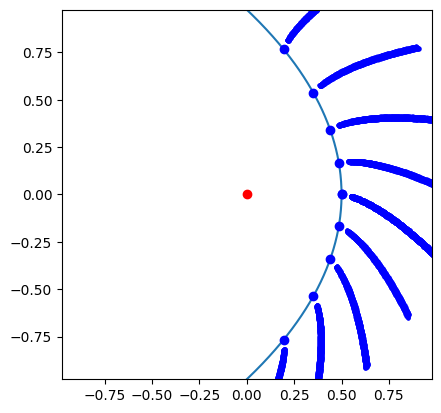

In [ ]:
from astrophysics.comet.comet import Comet

eccentricities = [0.95, 0.97]  # 離心率 e
mus = [
    0.0,
    -17,
]  # 輻射圧と重力の比 mu = F_{rad} / F_{grav}
ap = 0.50  # 近日点距離 A.U.
for ecc in eccentricities:
    for mu in mus:
        comet = Comet(mu=mu, eccentricity=ecc, distance_of_perihelion=ap)
        comet.draw()
    #     break
    # break

In [ ]:
from math import cos, sin, sqrt, pi
print("Astrophysics with a PC: COMET TAILS")
print("------------------------------------")
print()
print("---- Minimal solution program ----")
print()

print("Input parameters and orbital elements : ")
print("Perihelium distance (A.U.) : ")
ap = float(input())
print("Eccentricity of the comet orbit: ")
ecc = float(input())
print("Parameter 1 - mu : ")
mu = float(input())
print("Outflow velocity : ")
g = float(input())

p = ap * (1 + ecc)

for i in range(-4, 4):
    # this for-cycle considers 9 positions of the comet int its orbit
    # next block computes position of the nuvleus and parameters A1, A2 and A3 and shows these results on screen
    nu = 0.5 * i
    r = p / (1 + ecc * cos(nu))
    x = r * cos(nu)
    y = r * sin(nu)

    a1 = sqrt(2 / mu) * r
    a2 = 4 * ecc * r * sin(nu) / 3 / mu / sqrt(p)
    a3 = sqrt(8 * p / mu) / 3 / r

    print(
        f"Position {i:02} : true anomaly = {nu:6.2f} r = {r:6.2f} x = {x:6.2f} y = {y:6.2f}"
    )
    print(f"a1 = {a1:6.2f} a2 = {a2:6.2f} a3 = {a3:6.2f}")

    print("s\tt\tx\ty")

    for j in range(-1, 1):
        # this for-cycle considers 3 syndynames for each of the 9 positions
        gg = j * pi / 2
        ggdegree = j * 90

        print(f"Syndyname for G = {ggdegree:.0f}")

        for k in range(1, 9):
            # this for-cycle computes 9 points (s, t) and their (x', y') transformation
            s = 0.05 * k
            t = g * sin(gg) * (a1 * sqrt(s) - a2 * s) + a3 * s * sqrt(s)

            xx = (s * x + t * y + r * x) / r
            yy = (s * y - t * x + r * y) / r

            print(f"{s:6.2f}\t{t:6.2f}\t{xx:6.2f}\t{yy:6.2f}")

Astrophysics with a PC: COMET TAILS
------------------------------------

---- Minimal solution program ----

Input parameters and orbital elements : 
Perihelium distance (A.U.) : 


ValueError: could not convert string to float: ''